In [1]:
import sys
print(sys.path)
sys.path.append("../lqr")
from lqr_recursion import LqrRecursion
import chainer
import numpy as np
import matplotlib.pyplot as plt

['/Users/i19_arahata/Program/chainer-mpc/examples', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python37.zip', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7/lib-dynload', '/Users/i19_arahata/.pyenv/versions/3.7.2/lib/python3.7', '', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7/site-packages', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7/site-packages/IPython/extensions', '/Users/i19_arahata/.ipython']


/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7/site-packages/chainer/_environment_check.py:41: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Please be aware that Mac OS X is not an officially supported OS.

  ''')  # NOQA


In [2]:
T = 20
f = None
n_state =2
n_ctrl =1
n_sc = n_ctrl +n_state
F =chainer.Variable(np.array([(np.array([[1.0,1.0, 0],[0,1.0,1.0]])) for i in range(T)])).reshape(T,1,n_state,n_sc,)
c = chainer.Variable(np.array([(np.array([0,0,0.0]).T) for i in range(T)])).reshape(T,1,n_sc,)
C = chainer.Variable(np.array([np.array([[1.0,0 ,0],[0,0,0],[0,0,10]]) for i in range(T)])).reshape(T,1,n_sc, n_sc)
x_init = chainer.Variable(np.array([1.0, 0])).reshape(1,n_state)

In [3]:
test = LqrRecursion(x_init,C,c,F,f,T,n_state,n_ctrl)

In [4]:
Ks, ks = test.backward()

In [5]:
len(Ks)

20

(0, 20)

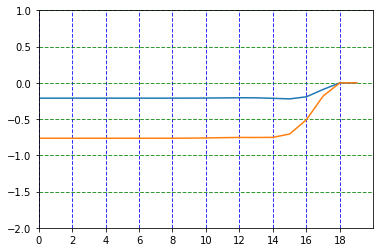

In [6]:
k1 =[]
k2 = []
fig, ax = plt.subplots()
for i in range(T):
    k1.append(Ks[i][0][0][0].data)
    k2.append(Ks[i][0][0][1].data)
major_ticks = np.arange(0, 20, 2)
ax.grid(which = "major", axis = "x", color = "blue", alpha = 0.8,
        linestyle = "--", linewidth = 1)
ax.grid(which = "major", axis = "y", color = "green", alpha = 0.8,
        linestyle = "--", linewidth = 1)
ax.set_xticks(major_ticks)            
ax.set_ylim(-0.5, 1.2)
ax.plot(k1)
ax.plot(k2)
ax.set_ylim(-2, 1)
ax.set_xlim(0,20)

In [7]:
x,u = test.solve_recursion()

In [8]:
u.shape

(20, 1, 1)

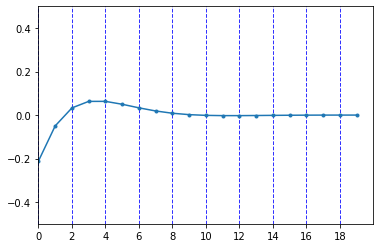

In [9]:
us = []
for i in range(T):
    us.append(u[i][0][0].data)
        
fig, ax = plt.subplots()
ax.grid(which = "major", axis = "x", color = "blue", alpha = 0.8,
        linestyle = "--", linewidth = 1)
major_ticks = np.arange(0, 20, 2)                                              
ax.set_xticks(major_ticks)        
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(0, 20)
ax.plot(us, marker='.')

In [10]:
Ks

[variable([[[-0.21140641, -0.7644787 ]]]),
 variable([[[-0.21140586, -0.7644768 ]]]),
 variable([[[-0.21140426, -0.76447274]]]),
 variable([[[-0.21140118, -0.76446661]]]),
 variable([[[-0.21139777, -0.76446147]]]),
 variable([[[-0.21139863, -0.76446226]]]),
 variable([[[-0.21141   , -0.76446005]]]),
 variable([[[-0.21142288, -0.76438096]]]),
 variable([[[-0.21136458, -0.76398918]]]),
 variable([[[-0.21102155, -0.76280464]]]),
 variable([[[-0.21001979, -0.76026033]]]),
 variable([[[-0.20810685, -0.75645049]]]),
 variable([[[-0.2060222 , -0.75330898]]]),
 variable([[[-0.20658451, -0.75382064]]]),
 variable([[[-0.21351635, -0.7523825 ]]]),
 variable([[[-0.2214034, -0.7055431]]]),
 variable([[[-0.19254658, -0.50931677]]]),
 variable([[[-0.09090909, -0.18181818]]]),
 variable([[[-0., -0.]]]),
 variable([[[-0., -0.]]])]

In [11]:
len(Ks)

20

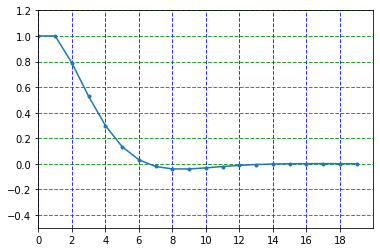

In [12]:
us = []
for i in range(T):
    us.append(x[i][0][0].data)
    
fig, ax = plt.subplots()
ax.grid(which = "major", axis = "x", color = "blue", alpha = 0.8,
        linestyle = "--", linewidth = 1)

# y軸に目盛線を設定
ax.grid(which = "major", axis = "y", color = "green", alpha = 0.8,
        linestyle = "--", linewidth = 1)

major_ticks = np.arange(0, 20, 2)                                              
ax.set_xticks(major_ticks)                                                       
ax.set_ylim(-0.5, 1.2)
ax.set_xlim(0, 20)
ax.plot(us, marker='.')
plt.show()

In [13]:
x.shape

(20, 1, 2)

In [14]:
x

variable([[[ 1.00000000e+00,  0.00000000e+00]],

          [[ 1.00000000e+00, -2.11406412e-01]],

          [[ 7.88593588e-01, -2.61196976e-01]],

          [[ 5.27396613e-01, -2.28231051e-01]],

          [[ 2.99165562e-01, -1.65248298e-01]],

          [[ 1.33917264e-01, -1.02165273e-01]],

          [[ 3.17519905e-02, -5.23737039e-02]],

          [[-2.06217134e-02, -1.90487883e-02]],

          [[-3.96705017e-02, -1.28355152e-04]],

          [[-3.97988569e-02,  8.35464560e-03]],

          [[-3.14442113e-02,  1.03800997e-02]],

          [[-2.10641116e-02,  9.09242820e-03]],

          [[-1.19716834e-02,  6.59804232e-03]],

          [[-5.37364105e-03,  4.09411039e-03]],

          [[-1.27953067e-03,  2.11799649e-03]],

          [[ 8.38465824e-04,  7.97653713e-04]],

          [[ 1.63611954e-03,  4.92354622e-05]],

          [[ 1.68535500e-03, -2.90870212e-04]],

          [[ 1.39448479e-03, -3.91198810e-04]],

          [[ 1.00328598e-03, -3.91198810e-04]]])

In [16]:
x.shape

(20, 1, 2)